# Vector fields
* Most code taken from workshop 1, "intro to coppelia part 2"
* Run in workshop3.ttt

In [3]:
# had to add these imports to be able to plot the environment
import matplotlib.pyplot as plt
import numpy as np

# Plotting the environment as a graph
* I did this before anything else cause I figured this was the best place for it.

In [35]:
# the very first thing I did was find the center of each cylinder, and their radii;
# That way, I could plot the locations.  I also found the robot's initial location,
# and the goal's location.

# I made an array with the center of every cylinder; since I'm only plotting them,
# order doesn't particularly matter.  Also I checked the cylinders, and their radii are
# all the same, 0.5, so I didn't bother writing down each individual one.
cylinder_positions = [[ 2.425,  4.075], [-0.525,  6.300], [ 4.400,  0.875], [-1.775,  2.100],
                      [-5.125,  3.425], [-5.800, -0.975], [ 2.825, -4.850], [ 7.275, -7.750]]

# I made an array with the corners of each box.  It was a headache, but it saved me
# some trouble in terms of trying to plot the boxes based on their centers.
# For the diagonal boxes I went a little bigger than reality, because I couldn't quite
# get the disk I was using on the exact corner.
            #        BL,               TL,               TR,          BR
box_corners = [[[ 9.425,  5.225], [ 9.425,  4.225], [ 5.425,  4.225], [ 5.425,  5.225]], # box 1
               [[-4.700,  6.900], [-4.700,  5.900], [-8.700,  5.900], [-8.700,  6.900]], # box 2
               [[ 4.600, -0.900], [ 3.950, -1.700], [ 0.850,  0.900], [ 1.500,  1.700]], # box 3 (NOT ACCURATE)
               [[ 0.975, -1.000], [ 0.975, -2.000], [-3.025, -2.000], [-3.025, -1.000]], # box 4
               [[-3.150, -6.750], [-3.675, -7.650], [-7.150, -5.650], [-6.650, -4.725]]] # box 5 (NOT ACCURATE)

robot_pos = [ 7.625,  8.550]
goal_pos =  [-7.425, -7.925]


# Plots

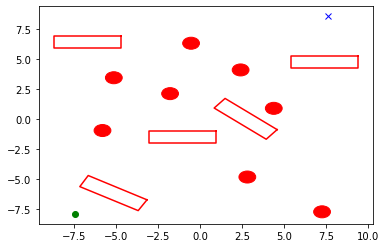

In [36]:
plt.plot(robot_pos[0], robot_pos[1], 'bx') # robot position
plt.plot(goal_pos[0], goal_pos[1], 'go')   # goal position
for box in box_corners:
    plt.plot([box[0][0], box[1][0], box[2][0], box[3][0], box[0][0]], [box[0][1], box[1][1], box[2][1], box[3][1], box[0][1]], 'r-')

fig = plt.gcf()
ax = fig.gca()
for cyl in cylinder_positions:
    cylinder = plt.Circle((cyl[0], cyl[1]), 0.5, color='r')
    ax.add_artist(cylinder)
    

# Add forces
* taken from the slides

In [37]:
# Potential function
def force_goal(x, y, goal):
    goal_x, goal_y, k_goal = goal
    Fx_goal, Fy_goal = k_goal * (goal_x - x), k_goal *(goal_y - y)
    return Fx_goal, Fy_goal
def force_obstacle(x, y, obstacle):
    (obs_x, obs_y, k_obs) = obstacle
    dist_x, dist_y = x - obs_x, y - obs_y
    dist_obs = np.hypot(dist_x, dist_y)
    Fx_obs = (dist_x / dist_obs) * k_obs / dist_obs ** 3
    Fy_obs = (dist_y / dist_obs) * k_obs / dist_obs ** 3

    return Fx_obs, Fy_obs

def total_force(x, y, goal, obstacles):
    Fx, Fy = force_goal(x, y, goal)
    
    for obs in obstacles:
        Fo_x, Fo_y = force_obstacle(x, y, obs)
        Fx += Fo_x
        Fy += Fo_y
    return Fx, Fy

def plot_vector_field(fmax = .15):
    X, Y = np.meshgrid(np.arange(0, 6.5, .2), np.arange(0, 4.5, .2))

    # Vector field of the forces
    Fx, Fy = total_force(X, Y, goal, obstacles)

    # For visualization
    F_m = np.hypot(Fx, Fy)
    Fx[F_m > fmax], Fy[F_m > fmax] = None, None
    # Plot
    # quiver(X, Y, Fx, Fy,  F_m, color='0.4', scale=None)
    ax.quiver(X, Y, Fx, Fy, color='0.4')



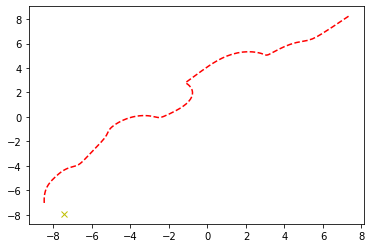

In [40]:
def simulate(q, goal, obstacles, num_steps=200, delta_time=1.9):
    trajectory = []
    for i in range(num_steps):
        force = total_force(q[0], q[1], goal, obstacles)
        # Robot velocity follows the force vector
        vel = np.array(force)
        # Integrate
        q += vel * delta_time
        trajectory.append(np.copy(q))

    return np.array(trajectory)

# Goal
goal = [-7.425, -7.925, 0.02]

# Obstacles (x, y, k), where k is the rejection multiplier
obstacles = [[ 9.425,  5.225, 0.2],
             [ 9.425,  4.225, 0.2],
             [ 5.425,  4.225, 0.2],
             [ 5.425,  5.225, 0.2], # box 1
             [-4.700,  6.900, 0.2],
             [-4.700,  5.900, 0.2],
             [-8.700,  5.900, 0.2],
             [-8.700,  6.900, 0.2], # box 2
             [ 4.600, -0.900, 0.2],
             [ 3.950, -1.700, 0.2],
             [ 0.850,  0.900, 0.2],
             [ 1.500,  1.700, 0.2], # box 3 (NOT ACCURATE)
             [ 0.975, -1.000, 1.5], # BL 4
             [ 0.975, -2.000, 1.5], # TL 4
             [-3.025, -2.000, 0.2], # TR 4
             [-3.025, -1.000, 0.2], # BR 4 box 4
             [-3.150, -6.750, 1.5],
             [-3.675, -7.650, 0.5],
             [-7.150, -5.650, 0.02],
             [-6.650, -4.725, 0.02], # box 5 (NOT ACCURATE)
             [ 2.425,  4.075, 0.5],
             [-0.525,  6.300, 0.02],
             [ 4.400,  0.875, 0.02],
             [-1.775,  2.100, 0.2],
             [-5.125,  3.425, 0.02],
             [-5.800, -0.975, 0.02],
             [ 2.825, -4.850, 0.02],
             [ 7.275, -7.750, 0.2]]

# Initial location
q = np.array(( 7.625,  8.550))

# Shoe result
trajectory = simulate(q, goal, obstacles,num_steps=220, delta_time=1.)
plt.plot(trajectory[:,0], trajectory[:,1], 'r--')
plt.plot(goal[0], goal[1], 'yx')
plot_vector_field()

##### import sim
%pylab inline

### Check if python is connecting to Coppelia

In [80]:
sim.simxFinish(-1)  # Close opened connections
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim

if clientID != -1:
    print('Connected')

    # Now try to retrieve data in a blocking fashion (i.e. a service call):
    res, objs = sim.simxGetObjects(clientID, sim.sim_handle_all, sim.simx_opmode_blocking)

    print('Simulation time in milliseconds: ', sim.simxGetLastCmdTime(clientID))
    
    # Get Object position
    name = 'Omnirob'
    err_code, cuboid = sim.simxGetObjectHandle(clientID, name, sim.simx_opmode_blocking)
    res, position = sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)        
    print('Omnirob is at [x,y,z]=', position)
    
    # Now close the connection to CoppeliaSim:
    sim.simxGetPingTime(clientID)
    sim.simxFinish(clientID)
    print('Disconnected')
else:
    print('Failed connecting to remote API server')


Connected
Simulation time in milliseconds:  0
Omnirob is at [x,y,z]= [7.624998569488525, 8.549997329711914, 0.35249894857406616]
Disconnected


# Robot

In [81]:
class robot():
    
    def __init__(self, frame_name, motor_names=[], client_id=0):  
        # If there is an existing connection
        if client_id:
                self.client_id = client_id
        else:
            self.client_id = self.open_connection()
            
        self.motors = self._get_handlers(motor_names) 
        
        # Robot frame
        self.frame =  self._get_handler(frame_name)
            
        
    def open_connection(self):
        sim.simxFinish(-1)  # just in case, close all opened connections
        self.client_id = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim 
        
        if clientID != -1:
            print('Robot connected')
        else:
            print('Connection failed')
        return clientID
        
    def close_connection(self):    
        sim.simxGetPingTime(self.client_id)  # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive.
        sim.simxFinish(self.client_id)  # Now close the connection to CoppeliaSim:
        print('Connection closed')
    
    def isConnected(self):
        c,result = sim.simxGetPingTime(self.client_id)
        # Return true if the robot is connected
        return result > 0         
        
    def _get_handler(self, name):
        err_code, handler = sim.simxGetObjectHandle(self.client_id, name, sim.simx_opmode_blocking)
        return handler
    
    def _get_handlers(self, names):
        handlers = []
        for name in names:
            handler = self._get_handler(name)
            handlers.append(handler)
        
        return handlers

    def send_motor_velocities(self, vels):
        for motor, vel in zip(self.motors, vels):
            err_code = sim.simxSetJointTargetVelocity(self.client_id, 
                                                      motor, vel, sim.simx_opmode_streaming)      
            
    def set_position(self, position, relative_object=-1):
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)        
        sim.simxSetObjectPosition(clientID, self.frame, relative_object, position, sim.simx_opmode_oneshot)
        
    def simtime(self):
        return sim.simxGetLastCmdTime(self.client_id)
    
    def get_position(self, relative_object=-1):
        # Get position relative to an object, -1 for global frame
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)
        res, position = sim.simxGetObjectPosition(self.client_id, self.frame, relative_object, sim.simx_opmode_blocking)        
        return array(position)
    
    def get_object_position(self, object_name):
        # Get Object position in the world frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, -1, sim.simx_opmode_blocking)
        return array(position)
    
    def get_object_relative_position(self, object_name):        
        # Get Object position in the robot frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, self.frame, sim.simx_opmode_blocking)
        return array(position)

In [82]:
# Joint names in coppelia for KUKA omnidirectional robot
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']


r = robot('Omnirob', motor_names)  # Create an instance of our robot

# Move the robot in a specific direction
vx = 0
vy = 0

r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])

r.close_connection()  # End

Robot connected
Connection closed


# P-Control

In [62]:
'''
I commented this out, in case I still need it.

# Joint name in coppelia
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot('Omnirob', motor_names)  # Create an instance of our robot

# Initial locations
robot_position = r.get_position()
print('Robot position: (%.2f, %.2f) '%(robot_position[0], robot_position[1]))

desired_position = r.get_object_position('Sphere1')
print('Desired position: (%.2f, %.2f) '%(desired_position[0], desired_position[1]))

relative_position = r.get_object_relative_position('Sphere1')
print('Relative position: (%.2f, %.2f) '%(relative_position[0], relative_position[1]))

    
# Time interval
time_steps = linspace(0, 20, 100)

for t in time_steps:
    # Sensing
    robot_position = r.get_position()
    desired_position = r.get_object_position('Sphere1')
         
    # P control
    u = 100 * (desired_position - robot_position)
    
    vx, vy, vz = u
    r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])
    
    time.sleep(20/100)

r.send_motor_velocities([0, 0, 0, 0])
r.close_connection()  # End
'''

Robot connected
Robot position: (7.62, 8.55) 
Desired position: (0.40, 8.05) 
Relative position: (-7.22, -0.50) 


KeyboardInterrupt: 

# Trajectory follower

A {straight-line trajectory} is a function that describes a segment of a straight line in the Euclidean space that starts at a point $\mathbf{p}_0$ at $t=0$ and ends at a point $\mathbf{p}_f$ at time $t=t_f$. The equation that describes the trajectory is:
	\begin{equation}
	\mathbf{\gamma}(t) = \mathbf{a}_1 t + \mathbf{a}_0,
	\label{eq:line}
	\end{equation}
	where $\mathbf{a}_1=\frac{\mathbf{p}_f - \mathbf{p}_0}{t_f}$ and $\mathbf{a}_0=\mathbf{p}_0$, for $t\in[0,t_f]$. 	

In [87]:
# Joint name in coppelia
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot('Omnirob', motor_names)  # Create an instance of our robot

# Initial locations
robot_position = r.get_position()
print('Robot position: (%.2f, %.2f) '%(robot_position[0], robot_position[1]))

desired_position = r.get_object_position('Sphere1')
print('Desired position: (%.2f, %.2f) '%(desired_position[0], desired_position[1]))

relative_position = r.get_object_relative_position('Sphere1')
print('Relative position: (%.2f, %.2f) '%(relative_position[0], relative_position[1]))


# Virtual disk
disk = robot('Disc', client_id=r.client_id)


# Time duration
tf = 5
# Time interval
time_steps = linspace(0, tf, 19)

# I padded elements in these arrays with 0's, because my OCD kicked in real hard
a0 = np.array([( 7.625,  8.55), ( 0.800,  8.05), ( 4.000,  6.225), ( 1.925,  2.225), 
               (-3.975,  0.00), (-3.575,  3.40), (-3.775,  5.200), (-8.000,  5.200),
               (-7.000, -4.00), (-3.975, -6.15), (-3.975, -7.500), (-6.650, -8.500),
               (-3.000, -4.15), ( 0.400, -3.30), ( 0.400, -7.750), ( 6.125, -6.150),
               ( 0.400, -7.75), ( 0.400, -3.30)])

a1 = np.array([(0.1,  0.0), (1.0,  0.00), (-0.2, -0.50), ( 0.5, -1.00),
               (0.0,  1.0), (0.0,  1.00), (-0.5,  0.00), ( 0.0, -1.00),
               (2.0,  0.0), (0.0, -1.00), (-0.5,  0.00), ( 1.0,  1.00),
               (1.0, -1.0), (0.0, -1.00), ( 1.0,  0.05), (-1.0, -0.05),
               (0.0,  1.0), (1.0,  0.05)])

a2 = np.array([(-1.107000000000000000, -0.060000000000000000),
               ( 0.023999999999999987, -0.119000000000000200),
               (-0.268999999999999960, -0.079999999999999860),
               (-0.908000000000000100, -0.067000000000000030),
               ( 0.047999999999999970, -0.192000000000000030),
               ( 0.076000000000000080, -0.183999999999999900),
               (-0.307000000000000050,  0.200000000000000000),
               (-0.280000000000000000, -0.704000000000000100),
               (-0.437000000000000060, -0.058000000000000114),
               ( 0.100000000000000000,  0.238000000000000100),
               (-0.321000000000000060, -0.320000000000000000),
               (-0.161999999999999900,  0.321999999999999950),
               ( 0.007999999999999972,  0.702000000000000200),
               (-0.200000000000000000, -0.144000000000000040),
               ( 0.487000000000000040,  0.181999999999999880),
               (-0.287000000000000030, -0.371999999999999900),
               (-0.200000000000000000,  0.124000000000000050),
               ( 0.127999999999999970,  0.075999999999999940)])

a3 = np.array([( 0.159600000000000000,  0.008000000000000000),
               (-0.019200000000000002,  0.009200000000000017),
               ( 0.045200000000000004,  0.003999999999999993),
               ( 0.114400000000000000,  0.035600000000000000),
               (-0.006399999999999999,  0.025600000000000000),
               (-0.016800000000000006,  0.011200000000000003),
               ( 0.047599999999999996, -0.040000000000000000),
               ( 0.064000000000000000,  0.107200000000000000),
               ( 0.031600000000000000, -0.005599999999999995),
               (-0.019999999999999993, -0.018400000000000007),
               ( 0.062800000000000010,  0.056000000000000000),
               ( 0.021599999999999994, -0.069600000000000000),
               (-0.014400000000000000, -0.093600000000000000),
               ( 0.040000000000000000,  0.033200000000000000),
               (-0.091600000000000000, -0.025599999999999994),
               ( 0.051600000000000000,  0.063599999999999990),
               ( 0.040000000000000000, -0.029200000000000004),
               (-0.030400000000000000, -0.010799999999999997)])
count = 0

for i in range(size(a1)):
    for t in time_steps:
        if (count >= 18):
            break
        x_traj = a0[count][0] + (a1[count][0] * t) + (a2[count][0] * (t ** 2)) + (a3[count][0] * (t ** 3))
        y_traj = a0[count][1] + (a1[count][1] * t) + (a2[count][1] * (t ** 2)) + (a3[count][1] * (t ** 3))
        z_traj = 1
        x_vel  = (a1[count][0] * t) + (a2[count][0] * (t ** 2)) + (a3[count][0] * (t ** 3))
        y_vel  = (a1[count][1] * t) + (a2[count][1] * (t ** 2)) + (a3[count][1] * (t ** 3))
        z_vel = 0

        vel_traj = a1

        disk.set_position((x_traj, y_traj, 1))

        # Sensing
        robot_position = r.get_position()



        # Trajectory tracker
        u = 10 * ([x_traj, y_traj, z_traj] - robot_position) + [x_vel, y_vel, z_vel]

        vx, vy, vz = u
        r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])



        time.sleep(tf/500)
    count += 1

r.close_connection() 

Robot connected
Robot position: (7.62, 8.55) 
Desired position: (0.40, 8.05) 
Relative position: (-7.22, -0.50) 
Robot connected
Connection closed


In [76]:
# Joint name in coppelia
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot('Omnirob', motor_names)  # Create an instance of our robot

# Connect to the sphere that will be a reference
ref_point = robot('Sphere11', client_id=r.client_id)

# Initial locations
robot_position = r.get_position()
print('Robot position: (%.2f, %.2f) '%(robot_position[0], robot_position[1]))
desired_position = r.get_object_position('Sphere1')
print('Desired position: (%.2f, %.2f) '%(desired_position[0], desired_position[1]))
relative_position = r.get_object_relative_position('Sphere1')
print('Relative position: (%.2f, %.2f) '%(relative_position[0], relative_position[1]))


tf = 10.
tstep = 0.1
a1 = (desired_position - robot_position) / tf
a0 = robot_position



# Time interval
time_steps = linspace(0, tf, int(tf/tstep))

for t in time_steps:
    # Compute the trajectory
    traj_point = a1*t + a0
    vel_traj = a1
    # Show the trajectory point
    ref_point.set_position(traj_point)
    
    # Location sesing
    robot_position = r.get_position()
    
    # drive the robot using the trajectory tracker
    u = 0.5*(traj_point - robot_position) + vel_traj
    
    
    vx, vy, vz = u
    r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])
    time.sleep(tstep)


    
r.send_motor_velocities([0, 0, 0, 0])

r.close_connection()  # End

Robot connected
Robot connected
Robot position: (7.62, 8.55) 
Desired position: (0.40, 8.05) 
Relative position: (-7.22, -0.50) 


KeyboardInterrupt: 